In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module


In [2]:
import numpy as np

# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(inputs)

[[0.19144708 0.03819337 0.60741781 0.41458414]
 [0.75865295 0.53651774 0.65600038 0.36034155]
 [0.43834987 0.8043397  0.21024527 0.15129482]
 [0.70605083 0.53419196 0.26424335 0.48208755]
 [0.83647799 0.19360965 0.6638927  0.78564888]
 [0.68343225 0.11866264 0.82904591 0.56757661]
 [0.55362148 0.66734998 0.32380582 0.81486975]
 [0.35235627 0.32224153 0.11697937 0.47311252]
 [0.15378571 0.72938169 0.42259844 0.44307417]
 [0.46344227 0.63002451 0.10790646 0.9576439 ]
 [0.67749115 0.35850951 0.47959222 0.07288048]
 [0.58397341 0.14724265 0.34809746 0.42861465]
 [0.30688872 0.31687813 0.62263448 0.09539906]
 [0.51114177 0.817957   0.72871042 0.11235362]
 [0.43893338 0.77409176 0.37816709 0.93369621]
 [0.22418902 0.84648049 0.87948418 0.87851568]
 [0.72526172 0.47987049 0.08894684 0.75976022]
 [0.35548161 0.63961937 0.41761768 0.12260384]
 [0.11987923 0.86254031 0.64333133 0.84980383]
 [0.12688467 0.15342962 0.77016219 0.19051811]]


In [2]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot


NameError: name 'np' is not defined

In [4]:
#set up functions
import numpy as np

def generate_grid(n, resolution):
    num_points = int(1 / resolution) + 1
    grid = np.mgrid[[slice(0, 1, 1j*num_points) for _ in range(n)]]
    grid = grid.reshape(n, -1).T  # Reshape to have n columns
    return grid

def generate_binary_combinations(n):
    # Use itertools.product to generate combinations and convert to a NumPy array
    combinations = np.array(list(itertools.product([0, 1], repeat=n)))
    return combinations


In [1]:

# Number of dimensions
n = 4  
corners = generate_binary_combinations(n)

# Initial set of inputs using corners to force choice of points farther from the surface of the hypothesis space
initial_np = np.load('initial_inputs.npy')
initial_inputs = np.vstack([initial_np, corners])  # Append to the inputs
inputs = initial_inputs.copy()  # Start with the initial inputs

# Number of farthest points to find
num_far_points = 10

# Resolution for the grid
resolution = 0.01

# Generate initial grid
grid_points = generate_grid(n, resolution)

# List to store newly added farthest points
new_points = []

for _ in range(num_far_points):
    tree = KDTree(inputs)  # Create a KD-tree for the current inputs
    distances = tree.query(grid_points)[0]  # Find distances to nearest input points
    max_index = np.argmax(distances)  # Index of the farthest point
    farthest_point = grid_points[max_index]  # The farthest point

    # Find the nearest point in inputs to the farthest_point
    tree_initial = KDTree(inputs)
    nearest_dist, nearest_index = tree_initial.query(farthest_point)  # Get nearest
    nearest_point = inputs[nearest_index]

    # Calculate the midpoint
    new_point = (farthest_point + nearest_point) / 2

    # Append to the inputs and new_points
    inputs = np.vstack([inputs, new_point])
    new_points.append(new_point)
    formatted_point = ', '.join(f"{coord:.6f}" for coord in new_point)
    print(f"Added farthest point: [{formatted_point}]")


# Loop to find and append farthest points
#for _ in range(num_far_points):
 #   tree = KDTree(inputs)  # Create a KD-tree for the current inputs
  #  distances = tree.query(grid_points)[0]  # Find distances to nearest input points
   # max_index = np.argmax(distances)  # Index of the farthest point
    #farthest_point = grid_points[max_index]  # The farthest point
    
    #inputs = np.vstack([inputs, ????])  # Append to the inputs
    #new_points.append(???)  # Store new point separately
    #formatted_point = ', '.join(f"{coord:.6f}" for coord in farthest_point_rounded)
    #print(f"Added farthest point: [{formatted_point}]")

# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(initial_inputs[:, 0], initial_inputs[:, 1], color='blue', label='Original Inputs', alpha=0.6)
if new_points:
    new_points = np.array(new_points)
    plt.scatter(new_points[:, 0], new_points[:, 1], color='red', label='New Farthest Points', edgecolors='k', s=100)
plt.title('Expanded Set of Input Points with Farthest Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'generate_binary_combinations' is not defined

#### BEGIN SECOND PHASE - RUN FROM HERE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from brokenaxes import brokenaxes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
# Import inputs and outputs
inputs1 = np.load('initial_inputs.npy')
outputs1 = np.load('initial_outputs.npy')
inputs2 = np.load('initial_inputs2.npy')
outputs2 = np.load('initial_outputs2.npy')

# Concatenate inputs and outputs
inputs = np.concatenate((inputs1, inputs2), axis=0)
outputs = np.concatenate((outputs1, outputs2), axis=0)

#Import check
print(len(inputs1),len(inputs2),len(inputs))
print(len(outputs1),len(outputs2),len(outputs))


20 20 40
20 20 40


In [5]:
new_inputs = np.array([[0.776811, 0.833675, 0.406903, 0.722435],[0.566716, 0.234331, 0.914523, 0.783788],[0.112095, 0.63324,0.939742,0.749258],[0.888405, 0.916837, 0.453451 ,0.486217],[0.244897, 0.836734, 0.877551, 0.877551],[0.163265, 0.857143, 0.877551, 0.877551],[0.183673, 0.938776, 0.959184, 0.836735],[0.102041, 0.999999, 0.999999, 0.571429],[0.22973,  0.999999, 0.999999 ,0.77027 ],[0.594595, 0.999999, 0.999999, 0.972973]])
new_outputs = np.array([334.9062341983918,363.47516373479544,439.8851425551642,651.3098808207359,1037.8970999926541,1117.172888401618,1896.3447721032564,1862.9981386077925, 2477.6757505937135,4540.902999825719])


In [6]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)

[6.44434399e+01 1.83013796e+01 1.12939795e-01 4.21089813e+00
 2.58370525e+02 7.84343889e+01 5.75715369e+01 1.09571876e+02
 8.84799176e+00 2.33223610e+02 2.44230883e+01 6.44201468e+01
 6.34767158e+01 7.97291299e+01 3.55806818e+02 1.08885962e+03
 2.88667516e+01 4.51815703e+01 4.31612757e+02 9.97233189e+00
 1.16473297e+03 1.21188493e+02 2.87522281e+02 1.98066524e+03
 5.28521436e+02 6.59070325e+01 2.73993040e+02 3.34964253e+02
 3.03509422e+00 3.16811442e+02 2.13695298e+03 1.63923940e+01
 1.47198474e+01 7.44697895e+00 5.40487146e+02 1.52854400e+02
 1.03383108e+02 2.53166057e+02 3.59261876e+01 2.10925883e+00
 3.34906234e+02 3.63475164e+02 4.39885143e+02 6.51309881e+02
 1.03789710e+03 1.11717289e+03 1.89634477e+03 1.86299814e+03
 2.47767575e+03 4.54090300e+03]


In [7]:
print(np.max(outputs))

4540.902999825719


#### Visualise New Outputs

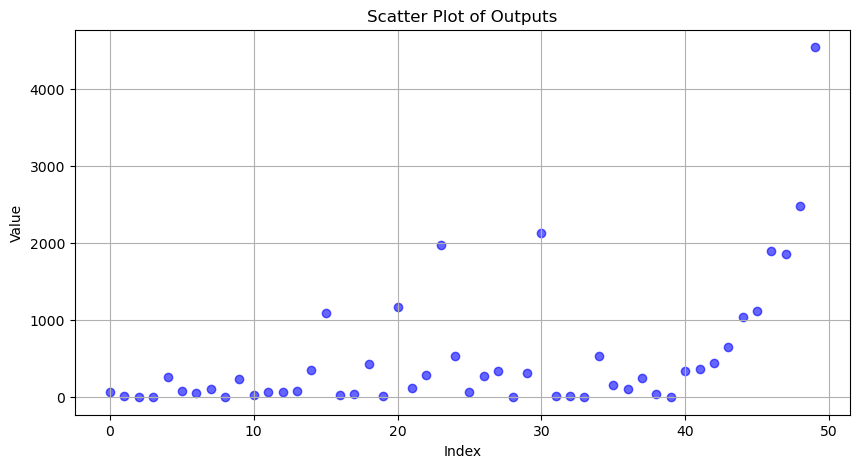

In [7]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Set N number of dimenstions
N = 4

# Define the kernel
kernel = C(1.0, (1e-2, 1e6)) * RBF(1.0, (1e-2, 1e6))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
gpr.fit(inputs, outputs)

# Generate test points for N dimensions
num_test_points = 75
test_points = np.array(np.meshgrid(*[np.linspace(0, 1, num_test_points)] * N)).T.reshape(-1, N)

# Predict using the Gaussian Process
y_pred, sigma = gpr.predict(test_points, return_std=True)

# Calculate UCB
kappa = 0.2  # Exploration-exploitation trade-off parameter
ucb = y_pred + kappa * sigma

# Identify the optimal inputs
max_ucb_index = np.argmax(ucb)
optimal_input = test_points[max_ucb_index]

# Round the optimal inputs to six decimal places
optimal_input_rounded = np.round(optimal_input, 6)

# Print the optimal inputs
formatted_query = [f'{item:.6f}' for item in optimal_input_rounded]
formatted_output = f'{formatted_query[0]}-{formatted_query[1]}-{formatted_query[2]}-{formatted_query[3]}'
print(formatted_output)

/Users/iangosling/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


## Change Log
#### 16th June
* Improved formatting
* Needed to raise kernel parameter k1 from 1e3 to 1e6
#### 20th June
* Reduced Kappa to 0.75 to increase exploitation
#### 7th JULY 
* Added in new data and cut reduced kappa to 0.2